Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


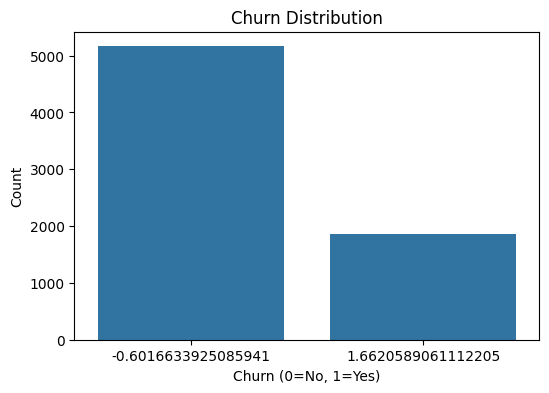

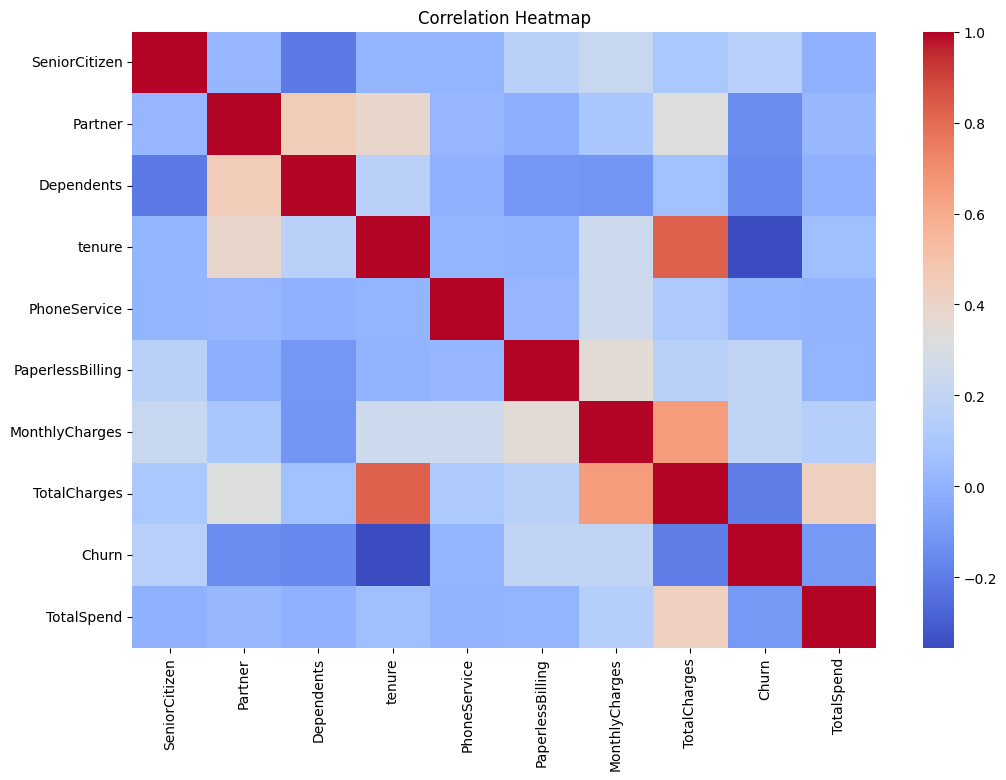

Summary statistics for numerical features:
        SeniorCitizen       Partner    Dependents        tenure  PhoneService  \
count   7.032000e+03  7.032000e+03  7.032000e+03  7.032000e+03  7.032000e+03   
mean    8.285623e-17  1.566185e-17 -5.961607e-17  5.254298e-17  3.031326e-17   
std     1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min    -4.403271e-01 -9.656081e-01 -6.523049e-01 -1.280248e+00 -3.056334e+00   
25%    -4.403271e-01 -9.656081e-01 -6.523049e-01 -9.542963e-01  3.271894e-01   
50%    -4.403271e-01 -9.656081e-01 -6.523049e-01 -1.394171e-01  3.271894e-01   
75%    -4.403271e-01  1.035617e+00  1.533025e+00  9.199259e-01  3.271894e-01   
max     2.271039e+00  1.035617e+00  1.533025e+00  1.612573e+00  3.271894e-01   

       PaperlessBilling  MonthlyCharges  TotalCharges         Churn  
count      7.032000e+03    7.032000e+03  7.032000e+03  7.032000e+03  
mean      -4.067029e-17    1.263052e-17  1.743012e-17 -6.062651e-18  
std        1.000071e+00  

In [1]:
# Telco Customer Churn Analysis: Data Cleaning, Preprocessing, Feature Engineering, and EDA

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load Dataset
data_path = 'teleconnect - raw dataset.csv'  # Path to the dataset
df = pd.read_csv(data_path)

# Step 2: Data Cleaning
# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Step 3: Data Quality Assessment
# Check for missing values and column consistency
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

# Check for unique identifiers or unnecessary columns
if 'customerID' in non_numeric_columns:
    # Drop the 'customerID' column as it is not useful for analysis or modeling
    df.drop(columns=['customerID'], inplace=True)
    non_numeric_columns.remove('customerID')

# Step 4: Encode Categorical Variables
# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Binary encoding for 'Yes'/'No' columns
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encoding for multi-class categorical columns
multi_class_columns = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)

# Step 5: Feature Engineering
# Initialize a StandardScaler for numerical feature normalization
scaler = StandardScaler()

# Identify numerical columns (excluding categorical and identifiers)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude non-numeric columns from numerical features
# If 'Gender' or other categorical columns were included, they need to be excluded here
numerical_features = [col for col in numerical_features if col not in ['Gender']]  # Example if 'Gender' is present

# Normalize only the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Add 'TotalSpend' feature
df['TotalSpend'] = df['tenure'] * df['MonthlyCharges']

# Create tenure groupings
df['TenureGroup'] = pd.cut(
    df['tenure'], 
    bins=[0, 12, 48, 100], 
    labels=['Short-term', 'Mid-term', 'Long-term']
)

# Encode tenure groupings
label_encoder = LabelEncoder()
df['TenureGroup'] = label_encoder.fit_transform(df['TenureGroup'])

# Normalize only the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create tenure groupings
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 48, 100],
    labels=['Short-term', 'Mid-term', 'Long-term']
)

# Encode tenure groupings (using the same LabelEncoder)
label_encoder = LabelEncoder()
df['TenureGroup'] = label_encoder.fit_transform(df['TenureGroup'])

# Step 7: Exploratory Data Analysis (EDA)
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Summary statistics for numerical features
print("Summary statistics for numerical features:\n", df[numerical_features].describe())

# Step 8: Save the Cleaned Dataset
cleaned_data_path = 'cleaned_telco_customer_churn.csv'
df.to_csv(cleaned_data_path, index=False)

# Displaying the first few rows of the cleaned dataset
print(df_encoded.head())
